In [17]:
%config Completer.use_jedi = False

### 1. Importing libreries

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
import pandas_profiling
from pandas_profiling import ProfileReport
from collections import Counter
from datetime import datetime as dt
import seaborn as sns

%matplotlib inline

In [3]:
print(f"Today is:\n{dt.today()}")
print(f"Pandas Version:{pd.__version__}")
print(f"Numpy Version:{np.__version__}")
print(f"matplotlib Version:{matplotlib.__version__}")
print(f"Seaborn Version:{sns.__version__}")
print(f"Pandas_Profiling Version:{pandas_profiling.__version__}")


Today is:
2021-06-01 13:54:42.262288
Pandas Version:1.2.4
Numpy Version:1.20.2
matplotlib Version:3.3.4
Seaborn Version:0.11.1
Pandas_Profiling Version:2.9.0


### 2. Read and loading Dataset

In [4]:
df = pd.read_csv('netflix_titles.csv')

### 3. An overview on Dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [6]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [7]:
df.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s5253,Movie,The Forty-Year-Old Version,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


**Generating profile reports from Data** (data type must be DataFrame) 

In [8]:
profile = ProfileReport(df)
profile

Summarize dataset:   0%|          | 0/26 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


### 4. Dealing with Missing/Null Values

In [11]:
df.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

We have missing values in 5 columns (features):
- ***director***
- ***cast***
- ***country***
- ***date added***
- ***rating***

I wanna to see what percentage of them are missing values!

In [9]:
for i in df.columns:
    null_rate = df[i].isna().sum()/len(df) * 100
    if null_rate > 0:
        print(f"Column '{i}' has null rate: {null_rate:.2f}%")

Column 'director' has null rate: 30.68%
Column 'cast' has null rate: 9.22%
Column 'country' has null rate: 6.51%
Column 'date_added' has null rate: 0.13%
Column 'rating' has null rate: 0.09%


In [22]:
df['director'].unique().shape

(4050,)

There is 4050 unique values for directors in this database, so it's not a important feature and I will dropp it.

In [23]:
df.drop(['director'], axis=1, inplace=True)

In [132]:
df['country'].value_counts()

United States                                             3062
India                                                      923
United Kingdom                                             397
Japan                                                      226
South Korea                                                183
                                                          ... 
Denmark, United Kingdom, South Africa, Sweden, Belgium       1
Spain, Portugal                                              1
Canada, Luxembourg                                           1
Brazil, France, Germany                                      1
United Kingdom, Hungary, Australia                           1
Name: country, Length: 681, dtype: int64

In [40]:
df['country'].value_counts()/len(df)*100

United States                                             39.321947
India                                                     11.853088
United Kingdom                                             5.098241
Japan                                                      2.902273
South Korea                                                2.350071
                                                            ...    
Denmark, United Kingdom, South Africa, Sweden, Belgium     0.012842
Spain, Portugal                                            0.012842
Canada, Luxembourg                                         0.012842
Brazil, France, Germany                                    0.012842
United Kingdom, Hungary, Australia                         0.012842
Name: country, Length: 681, dtype: float64

United States with about 40% is the the country with most contents in Netflix database, so ***it makes sense*** to replace the missing values with United states.

In [38]:
df['country'].replace(np.nan, 'United States', inplace=True)

In [41]:
df.isna().sum()

show_id           0
type              0
title             0
cast            718
country           0
date_added       10
release_year      0
rating            7
duration          0
listed_in         0
description       0
dtype: int64

In [39]:
df['country'].value_counts()

United States                                             3062
India                                                      923
United Kingdom                                             397
Japan                                                      226
South Korea                                                183
                                                          ... 
Denmark, United Kingdom, South Africa, Sweden, Belgium       1
Spain, Portugal                                              1
Canada, Luxembourg                                           1
Brazil, France, Germany                                      1
United Kingdom, Hungary, Australia                           1
Name: country, Length: 681, dtype: int64

In [13]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [173]:
plt.rc('font', size=12) #controls default text sizes
plt.rc('axes', titlesize=14) #fontsize of the axes title
plt.rc('axes', labelsize=12) #fontsize of the x and y labels
plt.rc('xtick', labelsize=12) #fontsize of the tick labels
plt.rc('ytick', labelsize=12) #fontsize of the tick labels
plt.rc('legend', fontsize=12) #legend fontsize
plt.rc('figure', titlesize=14) #fontsize of the figure title
plt.rcParams['figure.dpi'] = 100 #high resolution
sns.set_style('whitegrid')

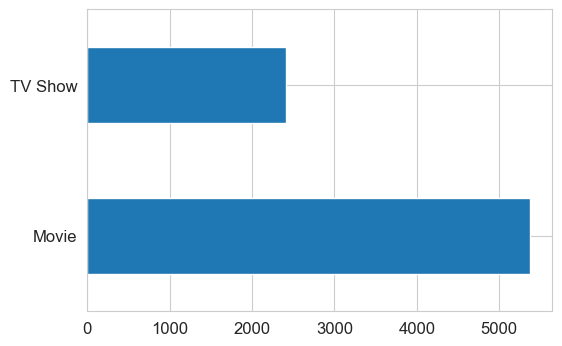

In [174]:
df['type'].value_counts().plot(kind='barh');

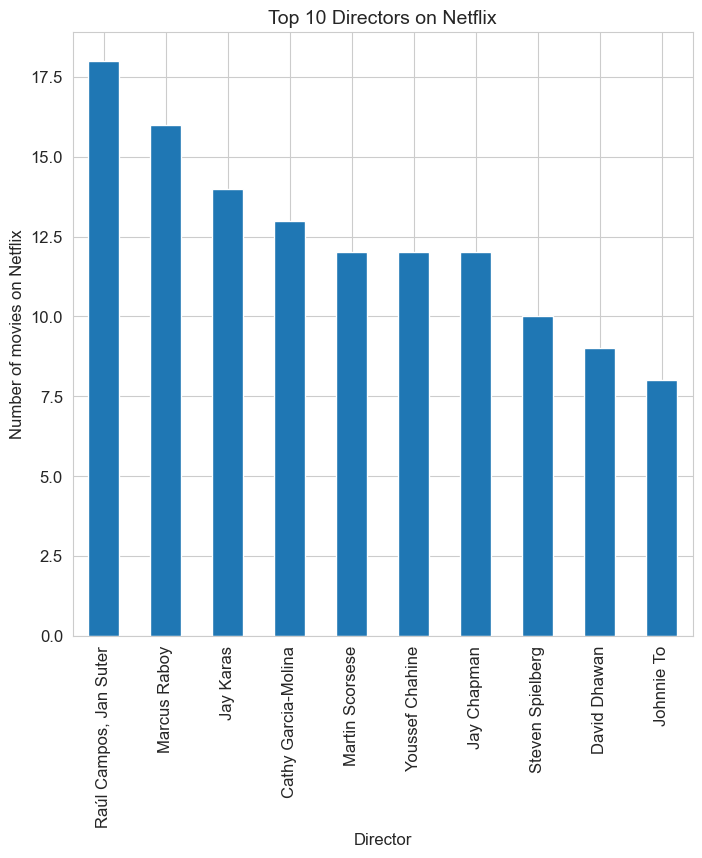

In [175]:
df.director.value_counts().nlargest(10).sort_values(ascending=False).plot(kind='bar', figsize=(8,8), 
                                             title='Top 10 Directors on Netflix',
                                             xlabel="Director",
                                             ylabel="Number of movies on Netflix"
                                            );


In [ ]:
rating = df.groupby(['rating']).size().reset_index(name='counts')

In [179]:
pieChart = px.pie(rating, values='counts', names='rating', 
                  title='Distribution of Content Ratings on Netflix',
                  color_discrete_sequence=px.colors.qualitative.Set3)
pieChart.show()

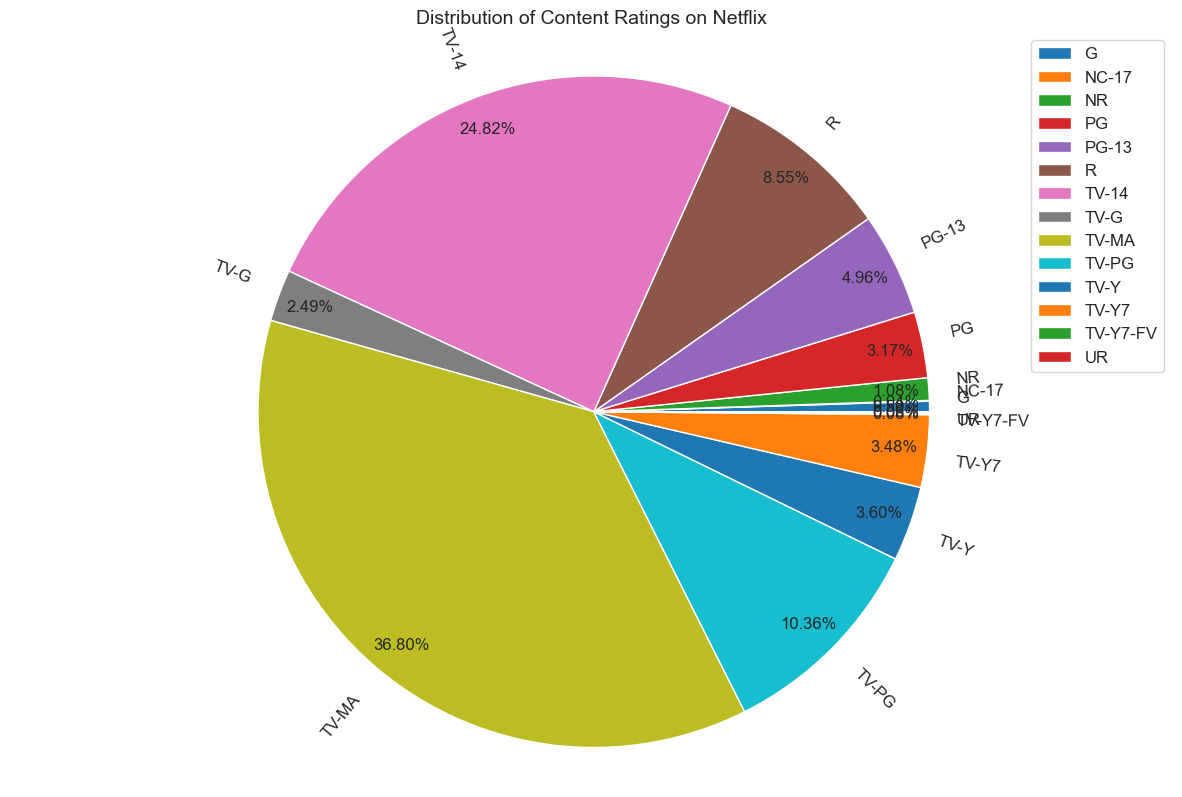

In [180]:
labels = list(z['rating'])
# explode=(0.7,0.7,0.7,0,0,0,0,0,0,0,0,0,0.7,0.7)

fig1, ax1 = plt.subplots(figsize=(15,10))
ax1.pie(list(z['counts']), explode=None, labels=labels, labeldistance=1.08, 
        autopct='%1.2f%%', pctdistance=0.9, radius=2, rotatelabels=True,
        shadow=False, startangle=0)

ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.legend(loc='best')
ax1.set_title('Distribution of Content Ratings on Netflix');


In [112]:
df = df.fillna('NULL')
df['year_added'] = df['date_added'].apply(lambda x :  x.split(',')[-1])
df['year_added'] = df['year_added'].apply(lambda x : x if x != 'NULL' else '2020')
df['year_added'] = df['year_added'].apply(int)

In [191]:
df.year_added.value_counts()

2019    2153
2020    2019
2018    1685
2017    1225
2016     443
2021     117
2015      88
2014      25
2011      13
2013      11
2012       3
2008       2
2009       2
2010       1
Name: year_added, dtype: int64

In [42]:
?Counter

In [114]:
country_data = df['country']
countries = ','.join(country_data)
# countries
countries = countries.replace(', ', ',')
countries = countries.replace(' ,', ',')
# countries

# Counting the number of iterations of countries using Counter 
country_counting = Counter(countries.split(','))
country_counting = pd.Series(dict(country_counting)).sort_values(ascending=False)
country_counting

United States     3804
India              990
United Kingdom     723
Canada             412
France             349
                  ... 
Samoa                1
Azerbaijan           1
Bermuda              1
Ecuador              1
Montenegro           1
Length: 118, dtype: int64

In [116]:
sum(country_counting[0:20])

8386

In [131]:
c = Counter(('ali, reza,reza, ali ,reza').replace(', ', ',').replace(' ,', ',').split(','))
c

Counter({'ali': 2, 'reza': 3})